In [1]:
using Pkg
Pkg.add(["Random", "Distributions", "Plots", "StatsPlots", "Statistics", "LinearAlgebra"])

    Updating registry at `C:\Users\bowus\.julia\registries\General.toml`
   Resolving package versions...
   Installed OffsetArrays ────── v1.14.1
   Installed StaticArraysCore ── v1.4.3
   Installed IntelOpenMP_jll ─── v2024.2.1+0
   Installed FFTW ────────────── v1.8.0
   Installed StaticArrays ────── v1.9.7
   Installed StatsPlots ──────── v0.15.7
   Installed Distances ───────── v0.10.11
   Installed NearestNeighbors ── v0.4.19
   Installed Ratios ──────────── v0.4.5
   Installed Clustering ──────── v0.15.7
   Installed oneTBB_jll ──────── v2021.12.0+0
   Installed MKL_jll ─────────── v2024.2.0+0
   Installed FFTW_jll ────────── v3.3.10+0
   Installed AbstractFFTs ────── v1.5.0
   Installed KernelDensity ───── v0.6.9
   Installed ChainRulesCore ──── v1.25.0
   Installed MultivariateStats ─ v0.10.3
   Installed Interpolations ──── v0.15.1
   Installed Adapt ───────────── v4.0.4
   Installed TableOperations ─── v1.2.0
   Installed Arpack_jll ──────── v3.5.1+1
   Installed Widgets ───

In [2]:
using Random, Distributions, Plots, StatsPlots, Statistics,LinearAlgebra
# Define the true parameters
β0 = 1.0    # Intercept
β1 = 2.0    # Slope
σ = 1.0     # Standard deviation of errors

1.0

In [7]:
# Function to simulate data and run OLS
function simulate_ols(n::Int)
    # Generate independent variable X
    X = randn(n)                       # Draw n samples from N(0, 1)
    ε = rand(Normal(0, σ), n)          # Random error term ε ~ N(0, σ^2)
    
    # Generate dependent variable Y based on the true model
    Y = β0 .+ β1 .* X .+ ε
    
    # Add a column of ones for the intercept
    X_matrix = [ones(n) X]
    
    # Estimate OLS coefficients: (X'X)^(-1) X'Y
    β_hat = inv(X_matrix' * X_matrix) * (X_matrix' * Y)
    
    return β_hat
end

simulate_ols (generic function with 1 method)

In [8]:
# Monte Carlo simulation
function monte_carlo_simulation(num_simulations::Int, sample_size::Int)
    β_hats = zeros(num_simulations, 2)  # Store OLS estimates [β0_hat, β1_hat]
    
    for i in 1:num_simulations
        β_hats[i, :] = simulate_ols(sample_size)
    end
    
    return β_hats
end

monte_carlo_simulation (generic function with 1 method)

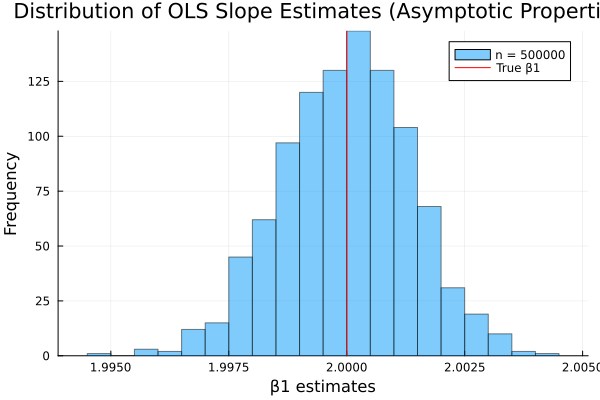

In [18]:
# Parameters for Monte Carlo
num_simulations = 1000         # Number of simulations
sample_sizes = [50, 100, 500]  # Different sample sizes to demonstrate asymptotics

# Run the simulation and plot the results
#for n in sample_sizes
n = 500000
    β_hats = monte_carlo_simulation(num_simulations, n)
    
    # Plot distribution of estimated β1 (slope)
    histogram(β_hats[:, 2], bins=30, alpha=0.5, label="n = $n", legend=:topright)
#end
# True value for β1
vline!([β1], label="True β1", color=:red)
xlabel!("β1 estimates")
ylabel!("Frequency")
title!("Distribution of OLS Slope Estimates (Asymptotic Properties)")

In [6]:
x = rand(Normal(0,2),10)

10-element Vector{Float64}:
 -3.0467664552470652
 -6.21400968149859
 -3.340855144911473
 -3.2419530998675428
  0.046301276060514505
  1.4707452070158438
  0.20214028147588875
 -3.145246163945298
  1.8383728363289966
  2.925171388812188